In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import spmatrix, amd
from math import floor


def np2sp(A):
    I = np.nonzero(A)[0]
    J = np.nonzero(A)[1]
    Asp = spmatrix(1.0, I, J, A.shape)
    return  Asp


def my_spy(A, **kwargs):
    """
    Plot a spy graph of spmatrix object A, return figure handle
    """
    
    import matplotlib.pyplot as plt
    from scipy import sparse as scipy_sparse
    import numpy as np
    
    colptr,rowidx,val = A.CCS
    M = scipy_sparse.csc_matrix((np.array(list(val)),np.array(list(rowidx)),np.array(list(colptr))))
    fig = plt.spy(M, **kwargs)
    
    return fig

def bandMatrix(n, bandwidth):
    # create a band matrix A with total dimension n and bandwidth given in the inputs 
    # how bandwidth is defined: a diagonal matrix has bandwidth 0, a tridiagonal matrix has bandwidth 1
    A = np.diag(np.ones(n)) 
    for i in range(1, bandwidth):
        A = A + np.diag(np.ones(n-i), i) + np.diag(np.ones(n-i), -i)
    return A

In [22]:
# metasurface
Ny = 13
Nx = 15
Nxy = Nx * Ny
A = np.diag(np.ones(Nxy)) + np.diag(np.ones(Nxy - 1), 1) 
idx = range(Ny, Ny*Nx, Ny)
A[[x - 1 for x in idx],idx] = 0
A = A + np.diag(np.ones(Nxy - Ny), Ny)
A = A + A.T

A2 = A.T @ A

A3 = bandMatrix(Nxy, 2 * Ny + 1)

# multi-layer
N = 200
B = np.diag(np.ones(N)) + np.diag(np.ones(N-1), -1) + np.diag(np.ones(N-1), 1)
B2 = np.matmul(B,B)

# three-level quantum
N = 66
N = 3*N
C = np.zeros([N, N])
for i in range(N):
    j = floor(i/3)
    if 3*j+6 <= N:
        idx = range(3*j, 3*j+6)
    else:
        idx = range(3*j, 3*j+3)
    C[i, idx] = 1
C2 = C.T @ C


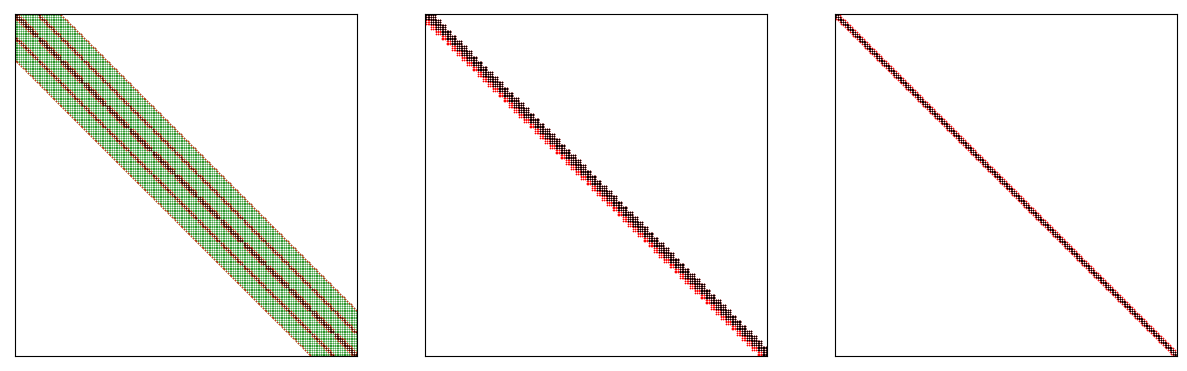

In [23]:
plt.figure(figsize=(15, 15), dpi=100)

plt.subplot(131)
mksz = 0.2
my_spy(np2sp(A3), color='green', markersize=mksz)
my_spy(np2sp(A2), color='red', markersize=mksz)
my_spy(np2sp(A), color='black', markersize=mksz)
plt.xticks([], labels=[])
plt.yticks([], labels=[])

plt.subplot(132)
mksz = 0.3
my_spy(np2sp(C2), color='red', markersize=mksz)
my_spy(np2sp(C), color='black', markersize=mksz)
plt.xticks([], labels=[])
plt.yticks([], labels=[])

plt.subplot(133)
mksz = 0.3
my_spy(np2sp(B2), color='red', markersize=mksz)
my_spy(np2sp(B), color='black', markersize=mksz)
plt.xticks([], labels=[])
plt.yticks([], labels=[])

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


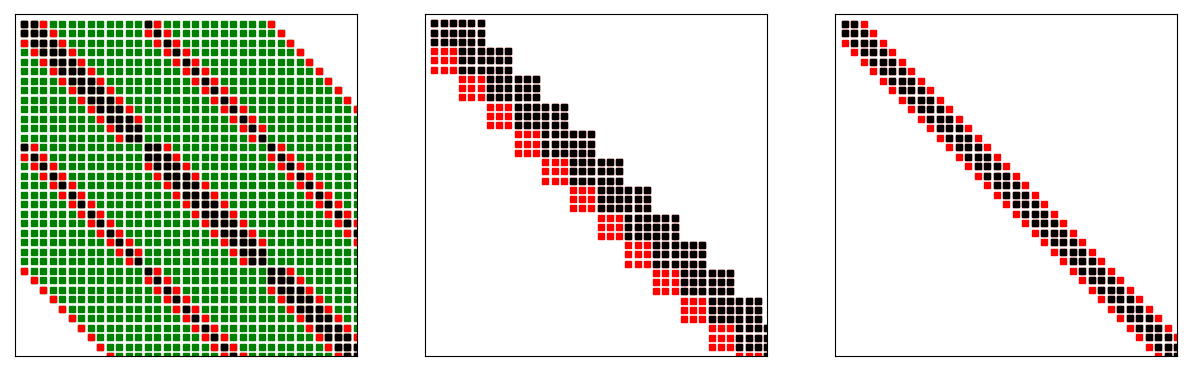

In [43]:
mksz = 5

plt.figure(figsize=(15, 15), dpi=100)

plt.subplot(131)

my_spy(np2sp(A3), color='green', markersize=mksz)
my_spy(np2sp(A2), color='red', markersize=mksz)
my_spy(np2sp(A), color='black', markersize=mksz)
plt.xticks([], labels=[])
plt.yticks([], labels=[])
plt.xlim([-1,35])
plt.ylim([-1,35])
plt.gca().invert_yaxis() 

plt.subplot(132)
my_spy(np2sp(C2), color='red', markersize=mksz)
my_spy(np2sp(C), color='black', markersize=mksz)
plt.xticks([], labels=[])
plt.yticks([], labels=[])
plt.xlim([-1,36])
plt.ylim([-1,36])
plt.gca().invert_yaxis() 


plt.subplot(133)
my_spy(np2sp(B2), color='red', markersize=mksz)
my_spy(np2sp(B), color='black', markersize=mksz)
plt.xticks([], labels=[])
plt.yticks([], labels=[])
plt.xlim([-1,35])
plt.ylim([-1,35])
plt.gca().invert_yaxis() 

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()
